In [77]:
import os
import ast
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [158]:
def extract_data(d, p, failure=True, faulty=False):
    # Directory where the files are located
    if faulty:
        directory = '/Users/nadinemeister/PycharmProjects/qsurface/tests/data_actualfaultymeas/'
    else:
        directory = '/Users/nadinemeister/PycharmProjects/qsurface/tests/data'
    merged_data_failure = defaultdict(int)

    if failure:
        string = f"d{d}_failure_p_{p}"
    else:
        string = f"d{d}_nofailure_p_{p}"
    
    # Iterate over the files in the directory
    for file_name in os.listdir(directory):
        if file_name.startswith(string):
            print(file_name)
            file_path = os.path.join(directory, file_name)

            # Read the file contents
            with open(file_path, "r") as file:
                file_contents = file.read()

            # Parse the dictionary from the file contents
            data_dict = ast.literal_eval(file_contents)

            # Merge the dictionary into the merged_data dictionary
            for key, value in data_dict.items():
                merged_data_failure.setdefault(key, 0)
                merged_data_failure[key] += value

#     # Process the merged data dictionary
#     for key, value in merged_data_failure.items():
#         # Process each key-value pair as needed
#         print("Key:", key)
#         print("Value:", value)
    
    return merged_data_failure

def calc_problogfailure(d, p, faulty=False):
    merged_data_nofailure = extract_data(d, p, failure=False, faulty=faulty)
    merged_data_failure = extract_data(d, p, failure=True, faulty=faulty)
    
    pr_log_failure = {}
    for key in merged_data_nofailure:
        sum_values = merged_data_nofailure[key] + merged_data_failure[key]
        pr_log_failure[key] = merged_data_failure[key] / sum_values
    return pr_log_failure

def plot_problogfailure(d, p, faulty=False):
    pr_log_failure = calc_problogfailure(d, p, faulty=faulty)
    sorted_data = sorted(pr_log_failure.items(), key=lambda item: float(item[0]))
    x = [float(item[0]) for item in sorted_data]
    y = np.array([item[1] for item in sorted_data])
    loggedy = np.log(y/(1-y))
    
    valid_indices = np.isfinite(loggedy)
    x_valid = np.array(x)[valid_indices]
    y_valid = np.array(loggedy)[valid_indices]

    # Fit a linear line
    coefficients = np.polyfit(x_valid, y_valid, 1)

    print(coefficients)
    slope = coefficients[0]
    intercept = coefficients[1]

    # Generate the fitted line
    x_fit = np.linspace(min(x_valid), max(x_valid), 100)
    y_fit = slope * x_fit + intercept

    # Plot the data and the fitted line
    plt.plot(x_fit, y_fit, color='orange', linestyle='dashed', alpha=0.8)
    
    plt.plot(x, loggedy, marker='o', label=f"slope={slope}")
    plt.xlabel(f'$\phi$')
    plt.ylabel('log(q/1-q) for q = prob of logical failure')
    plt.title(f'd={d} surface code, constant p={p} of bit flip error')
    plt.legend()
    plt.grid(True)

    plt.savefig(f"/Users/nadinemeister/Dropbox/My Mac (Nadine’s MacBook Pro)/Documents/Harvard/Physics/Caltech/images/phi_d9_p{int(p*100)}_faulty{faulty}.png", dpi=300)
    plt.show()
    return slope

d9_nofailure_p_0.02_num100000_2023-06-27_16-19-24.txt
d9_failure_p_0.02_num100000_2023-06-27_16-19-24.txt
[-0.76145937  1.15964301]


<ipython-input-138-9f370d005ec1>:55: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))


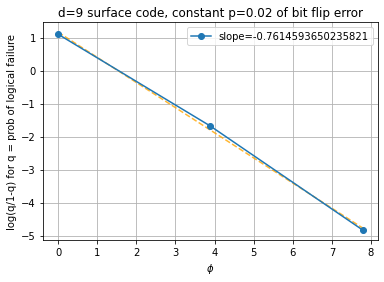

d9_nofailure_p_0.05_num100000_2023-06-27_17-44-27.txt
d9_nofailure_p_0.05_num100000_2023-06-27_16-22-41.txt
d9_failure_p_0.05_num100000_2023-06-27_17-44-27.txt
d9_failure_p_0.05_num100000_2023-06-27_16-22-41.txt
[-0.6083734   0.09868771]


<ipython-input-138-9f370d005ec1>:55: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))


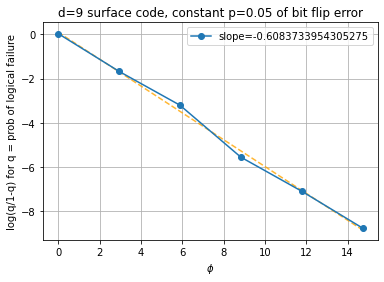

d9_nofailure_p_0.1_num100000_2023-06-27_16-26-31.txt
d9_failure_p_0.1_num100000_2023-06-27_16-26-31.txt
[-0.44428974  0.11441511]


<ipython-input-138-9f370d005ec1>:55: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))


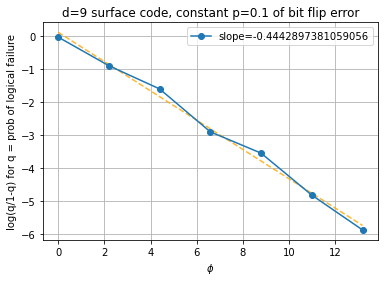

d9_nofailure_p_0.2_num100000_2023-06-27_16-31-09.txt
d9_failure_p_0.2_num100000_2023-06-27_16-31-09.txt
[-0.09802429  0.05239074]


<ipython-input-138-9f370d005ec1>:55: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))


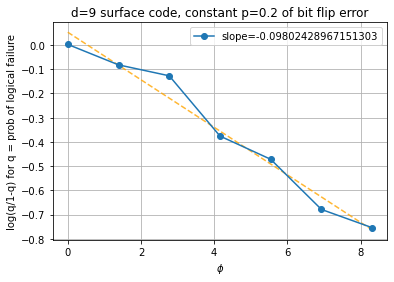

In [139]:
ps = [0.02, 0.05, 0.1, 0.2]
slopes = []
for p in ps:
    slopes.append(plot_problogfailure(9, p))

In [119]:
slopes

[-0.7614593650235821,
 -0.6650588025492873,
 -0.4442897381059056,
 -0.09802428967151303]

d7_nofailure_p_0.05_num100000_2023-06-27_17-38-24.txt
d7_failure_p_0.05_num100000_2023-06-27_17-38-24.txt
[-0.61011698  0.08739259]


<ipython-input-122-45265a5beb63>:52: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))


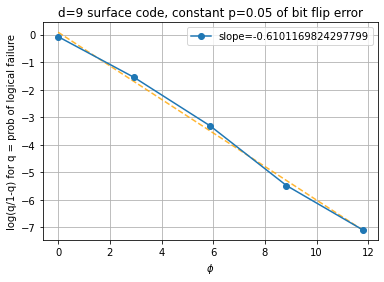

-0.6101169824297799

In [123]:
plot_problogfailure(7, 0.05)

d8_nofailure_p_0.05_num100000_2023-06-27_17-40-59.txt
d8_nofailure_p_0.05_num200000_2023-06-27_17-52-32.txt
d8_failure_p_0.05_num100000_2023-06-27_17-40-59.txt
d8_failure_p_0.05_num200000_2023-06-27_17-52-32.txt
[-0.55234301 -0.17503633]


<ipython-input-122-45265a5beb63>:52: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))


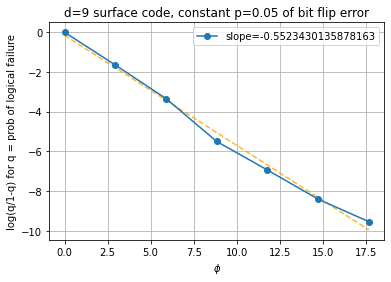

-0.5523430135878163

In [130]:
plot_problogfailure(8, 0.05)

d9_nofailure_p_0.05_num100000_2023-06-27_17-44-27.txt
d9_nofailure_p_0.05_num100000_2023-06-27_16-22-41.txt
d9_failure_p_0.05_num100000_2023-06-27_17-44-27.txt
d9_failure_p_0.05_num100000_2023-06-27_16-22-41.txt
[-0.6083734   0.09868771]


<ipython-input-122-45265a5beb63>:52: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))


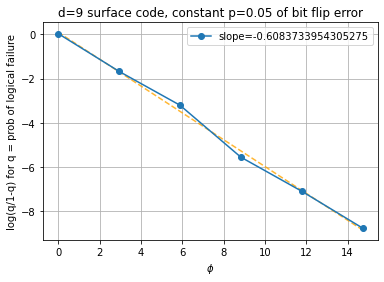

-0.6083733954305275

In [127]:
plot_problogfailure(9, 0.05)

d10_nofailure_p_0.05_num100000_2023-06-27_17-49-04.txt
d10_failure_p_0.05_num100000_2023-06-27_17-49-04.txt
[-0.57118528 -0.0788031 ]


<ipython-input-122-45265a5beb63>:52: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))


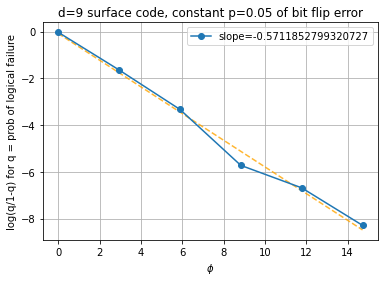

-0.5711852799320727

In [129]:
plot_problogfailure(10, 0.05)

# Multiply rounds of measurements

d9_nofailure_p_0.02_num10000_2023-06-28_13-06-45.txt
d9_nofailure_p_0.02_num1000_2023-06-28_12-32-26.txt
d9_nofailure_p_0.02_num1000_2023-06-28_12-43-09.txt
d9_failure_p_0.02_num1000_2023-06-28_12-32-26.txt
d9_failure_p_0.02_num1000_2023-06-28_12-43-09.txt
d9_failure_p_0.02_num10000_2023-06-28_13-06-45.txt
[-0.63759941 -0.26469703]


<ipython-input-158-3980743c6234>:55: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))


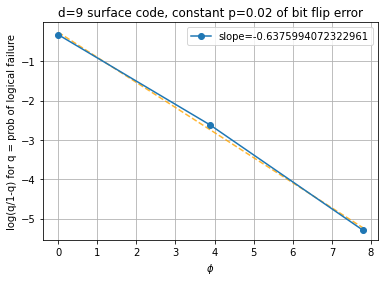

d9_nofailure_p_0.03_num10000_2023-06-28_13-35-49.txt
d9_failure_p_0.03_num10000_2023-06-28_13-35-49.txt
[-0.54810988  0.15270632]


<ipython-input-158-3980743c6234>:55: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))


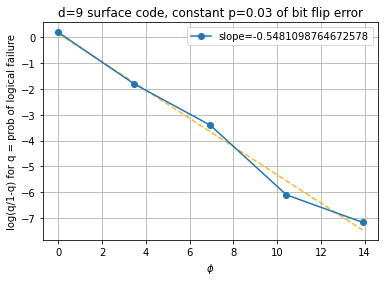

d9_nofailure_p_0.04_num10000_2023-06-28_13-45-02.txt
d9_failure_p_0.04_num10000_2023-06-28_13-45-02.txt
[-0.54844151  0.30119925]


<ipython-input-158-3980743c6234>:55: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))


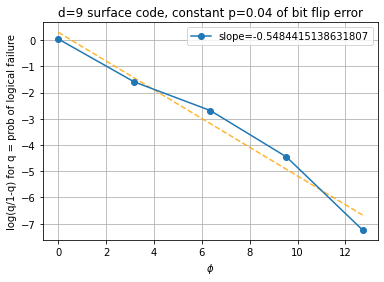

d9_nofailure_p_0.05_num10000_2023-06-28_13-16-35.txt
d9_nofailure_p_0.05_num1000_2023-06-28_12-33-29.txt
d9_nofailure_p_0.05_num1000_2023-06-28_12-44-05.txt
d9_failure_p_0.05_num10000_2023-06-28_13-16-35.txt
d9_failure_p_0.05_num1000_2023-06-28_12-33-29.txt
d9_failure_p_0.05_num1000_2023-06-28_12-44-05.txt
[-0.37459917  0.0707699 ]


<ipython-input-158-3980743c6234>:55: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))


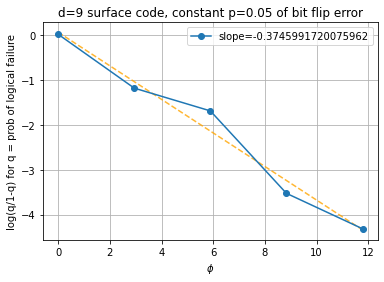

d9_nofailure_p_0.06_num10000_2023-06-28_14-03-50.txt
d9_failure_p_0.06_num10000_2023-06-28_14-03-50.txt
[-0.21869422  0.00756838]


<ipython-input-158-3980743c6234>:55: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))


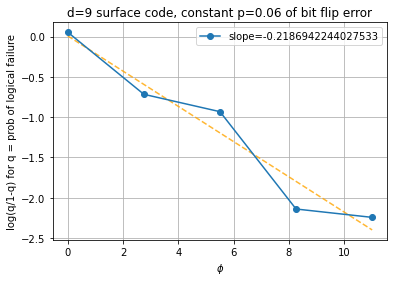

d9_nofailure_p_0.07_num10000_2023-06-28_14-13-41.txt
d9_failure_p_0.07_num10000_2023-06-28_14-13-41.txt
[-0.22288896  0.26909258]


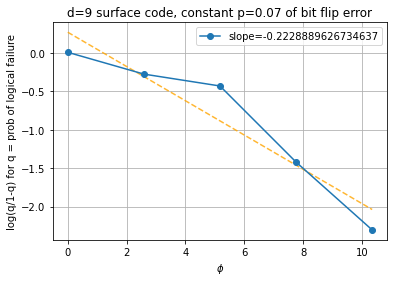

d9_nofailure_p_0.08_num10000_2023-06-28_14-24-59.txt
d9_failure_p_0.08_num10000_2023-06-28_14-24-59.txt
[-0.06169151  0.1030893 ]


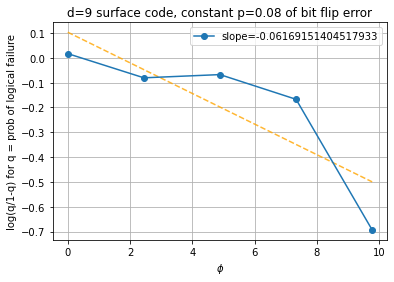

d9_nofailure_p_0.09_num10000_2023-06-28_14-37-10.txt
d9_failure_p_0.09_num10000_2023-06-28_14-37-10.txt
[-0.09196082  0.1270745 ]


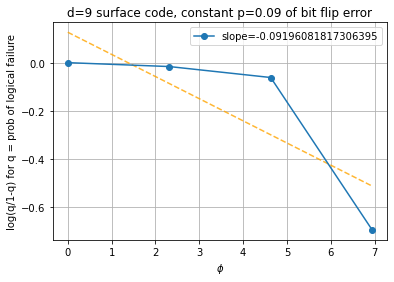

d9_nofailure_p_0.15_num1000_2023-06-28_12-47-09.txt
d9_nofailure_p_0.15_num10000_2023-06-28_13-38-25.txt
d9_nofailure_p_0.1_num1000_2023-06-28_12-45-06.txt
d9_nofailure_p_0.1_num50000_2023-06-28_14-47-16.txt
d9_nofailure_p_0.1_num10000_2023-06-28_13-27-29.txt
d9_nofailure_p_0.1_num1000_2023-06-28_12-34-37.txt
d9_nofailure_p_0.15_num1000_2023-06-28_12-35-42.txt
d9_failure_p_0.15_num1000_2023-06-28_12-47-09.txt
d9_failure_p_0.1_num50000_2023-06-28_14-47-16.txt
d9_failure_p_0.1_num1000_2023-06-28_12-45-06.txt
d9_failure_p_0.1_num1000_2023-06-28_12-34-37.txt
d9_failure_p_0.15_num10000_2023-06-28_13-38-25.txt
d9_failure_p_0.1_num10000_2023-06-28_13-27-29.txt
d9_failure_p_0.15_num1000_2023-06-28_12-35-42.txt
[ 0.01801947 -0.02140002]


<ipython-input-158-3980743c6234>:55: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))


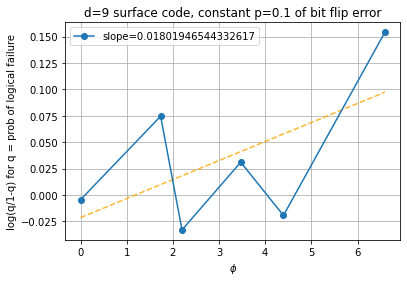

d9_nofailure_p_0.15_num1000_2023-06-28_12-47-09.txt
d9_nofailure_p_0.15_num10000_2023-06-28_13-38-25.txt
d9_nofailure_p_0.15_num1000_2023-06-28_12-35-42.txt
d9_failure_p_0.15_num1000_2023-06-28_12-47-09.txt
d9_failure_p_0.15_num10000_2023-06-28_13-38-25.txt
d9_failure_p_0.15_num1000_2023-06-28_12-35-42.txt
[0.01158159 0.01211447]


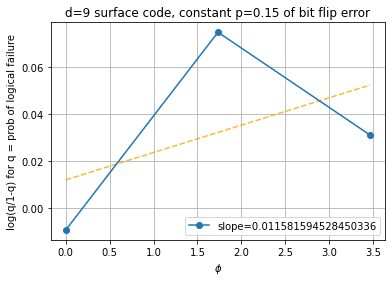

d9_nofailure_p_0.2_num1000_2023-06-28_13-03-09.txt
d9_nofailure_p_0.2_num10000_2023-06-28_13-49-44.txt
d9_nofailure_p_0.2_num1000_2023-06-28_12-36-45.txt
d9_failure_p_0.2_num1000_2023-06-28_13-03-09.txt
d9_failure_p_0.2_num10000_2023-06-28_13-49-44.txt
d9_failure_p_0.2_num1000_2023-06-28_12-36-45.txt
[-8.93489113e-05  3.50023866e-02]


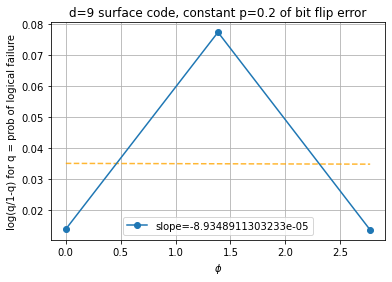

In [163]:
# all d = 9

ps = [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15, 0.2]
slopes = []
for p in ps:
    slopes.append(plot_problogfailure(9, p, faulty=True))

d5_nofailure_p_0.02_num50000_2023-06-28_14-24-23.txt
d5_failure_p_0.02_num50000_2023-06-28_14-24-23.txt
[-0.6168178   0.12264422]


<ipython-input-158-3980743c6234>:55: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))


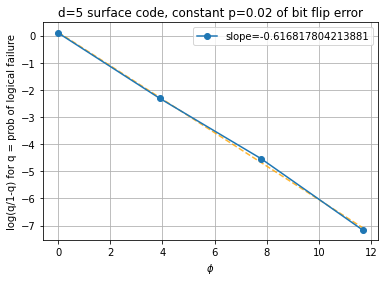

d6_nofailure_p_0.02_num50000_2023-06-28_14-36-11.txt
d6_failure_p_0.02_num50000_2023-06-28_14-36-11.txt
[-0.62096212  0.33382198]


<ipython-input-158-3980743c6234>:55: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))


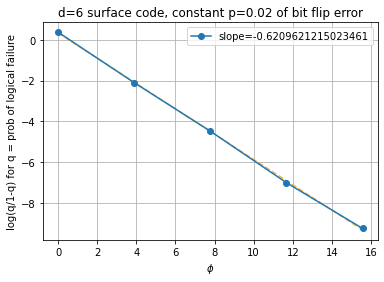

d7_nofailure_p_0.02_num1000_2023-06-28_12-29-53.txt
d7_nofailure_p_0.02_num1000_2023-06-28_12-37-30.txt
d7_failure_p_0.02_num1000_2023-06-28_12-37-30.txt
d7_failure_p_0.02_num1000_2023-06-28_12-29-53.txt
[-0.60620719 -0.1228678 ]


<ipython-input-158-3980743c6234>:55: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))


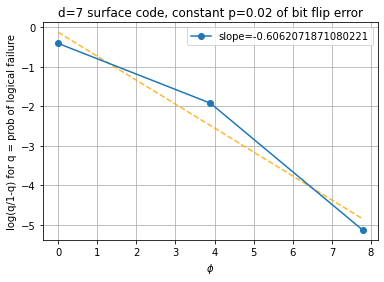

d8_nofailure_p_0.02_num1000_2023-06-28_12-39-37.txt
d8_failure_p_0.02_num1000_2023-06-28_12-39-37.txt
[-5.02595534e-01 -1.64967846e-16]


<ipython-input-158-3980743c6234>:55: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))


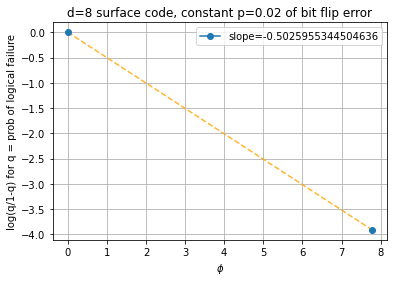

d9_nofailure_p_0.02_num10000_2023-06-28_13-06-45.txt
d9_nofailure_p_0.02_num1000_2023-06-28_12-32-26.txt
d9_nofailure_p_0.02_num1000_2023-06-28_12-43-09.txt
d9_failure_p_0.02_num1000_2023-06-28_12-32-26.txt
d9_failure_p_0.02_num1000_2023-06-28_12-43-09.txt
d9_failure_p_0.02_num10000_2023-06-28_13-06-45.txt
[-0.63759941 -0.26469703]


<ipython-input-158-3980743c6234>:55: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))


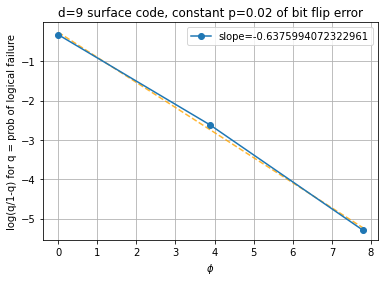

d10_nofailure_p_0.02_num1000_2023-06-28_13-04-25.txt
d10_failure_p_0.02_num1000_2023-06-28_13-04-25.txt
[-0.3080686  -1.19894764]


<ipython-input-158-3980743c6234>:55: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))
<ipython-input-159-2926fa15af65>:6: RankWarning: Polyfit may be poorly conditioned
  slopes.append(plot_problogfailure(d, 0.02, faulty=True))


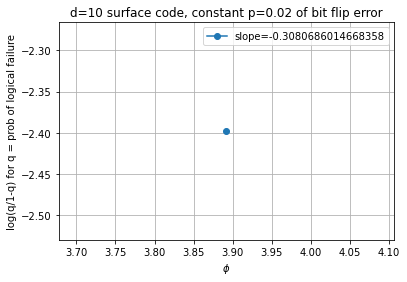

TypeError: expected non-empty vector for x

In [159]:
# all p = 0.02

ds = [5, 6, 7, 8, 9, 10, 11]
slopes = []
for d in ds:
    slopes.append(plot_problogfailure(d, 0.02, faulty=True))

d5_nofailure_p_0.01_num10000_2023-06-28_14-11-27.txt
d5_failure_p_0.01_num10000_2023-06-28_14-11-27.txt
[-0.65139979 -0.11778304]


<ipython-input-158-3980743c6234>:55: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))


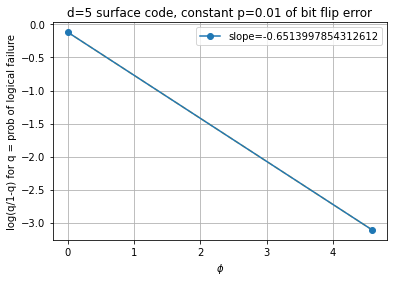

d6_nofailure_p_0.01_num10000_2023-06-28_14-13-20.txt
d6_failure_p_0.01_num10000_2023-06-28_14-13-20.txt
[-0.60675086  0.69314718]


<ipython-input-158-3980743c6234>:55: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))


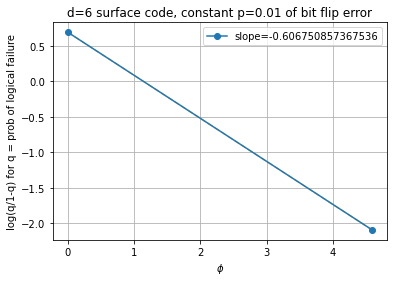

d7_nofailure_p_0.01_num10000_2023-06-28_14-16-52.txt
d7_failure_p_0.01_num10000_2023-06-28_14-16-52.txt
[-0.68048593  1.40190802]


<ipython-input-158-3980743c6234>:55: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))


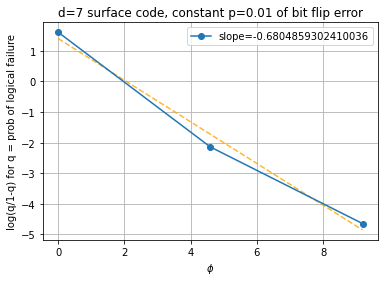

d8_nofailure_p_0.01_num10000_2023-06-28_14-23-16.txt
d8_failure_p_0.01_num10000_2023-06-28_14-23-16.txt
[-0.2703854  -1.24245332]


<ipython-input-158-3980743c6234>:55: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))
<ipython-input-164-90c7e63d50a5>:7: RankWarning: Polyfit may be poorly conditioned
  slopes.append(plot_problogfailure(d, p, faulty=True))


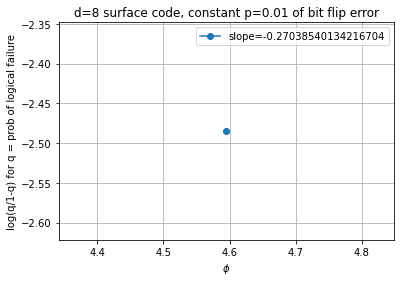

d9_nofailure_p_0.01_num10000_2023-06-28_14-33-32.txt
d9_failure_p_0.01_num10000_2023-06-28_14-33-32.txt


<ipython-input-158-3980743c6234>:55: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))


TypeError: expected non-empty vector for x

In [164]:
# all p = 0.02

p = 0.01
ds = [5, 6, 7, 8, 9, 10, 11]
slopes = []
for d in ds:
    slopes.append(plot_problogfailure(d, p, faulty=True))

# Faulty measurements actually

d5_nofailure_p_0.02_num50000_2023-06-28_14-24-23.txt
d5_failure_p_0.02_num50000_2023-06-28_14-24-23.txt
[-0.6168178   0.12264422]


<ipython-input-158-3980743c6234>:55: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))


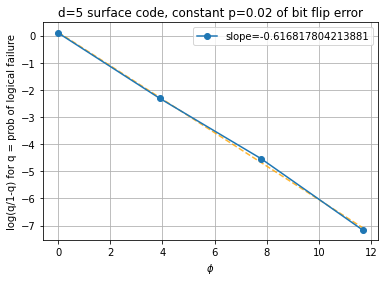

d6_nofailure_p_0.02_num50000_2023-06-28_14-36-11.txt
d6_failure_p_0.02_num50000_2023-06-28_14-36-11.txt
[-0.62096212  0.33382198]


<ipython-input-158-3980743c6234>:55: RuntimeWarning: divide by zero encountered in log
  loggedy = np.log(y/(1-y))


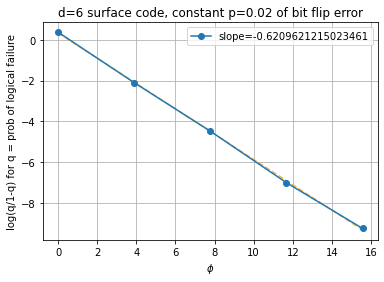

In [166]:
# all p = 0.02

ds = [5, 6]
slopes = []
for d in ds:
    slopes.append(plot_problogfailure(d, 0.02, faulty=True))